In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [95]:
data=pd.read_csv("hp_printer_reviews_5000.csv")
data.head()

,Review Text,Product Name
0,I had no issues when it prints in high resolut...,HP Envy 6055e Wireless Color Printer
1,Been using it since July and it’s been I regre...,HP Smart Tank 500 All-in-One
2,Got this printer during a truth sale. It barel...,HP Envy 6055e Wireless Color Printer
3,It performs excellently when it runs quietly w...,HP Smart Tank 500 All-in-One
4,I had no issues when it supports wireless prin...,HP Smart Tank 500 All-in-One


In [96]:
data.columns=data.columns.str.lower()

In [97]:
data.head()

,review text,product name
0,I had no issues when it prints in high resolut...,HP Envy 6055e Wireless Color Printer
1,Been using it since July and it’s been I regre...,HP Smart Tank 500 All-in-One
2,Got this printer during a truth sale. It barel...,HP Envy 6055e Wireless Color Printer
3,It performs excellently when it runs quietly w...,HP Smart Tank 500 All-in-One
4,I had no issues when it supports wireless prin...,HP Smart Tank 500 All-in-One


In [98]:
data.columns=data.columns.str.replace(" ","_")

In [99]:
data.head()

,review_text,product_name
0,I had no issues when it prints in high resolut...,HP Envy 6055e Wireless Color Printer
1,Been using it since July and it’s been I regre...,HP Smart Tank 500 All-in-One
2,Got this printer during a truth sale. It barel...,HP Envy 6055e Wireless Color Printer
3,It performs excellently when it runs quietly w...,HP Smart Tank 500 All-in-One
4,I had no issues when it supports wireless prin...,HP Smart Tank 500 All-in-One


In [100]:
data.isnull().mean()*100

,0
review_text,0.0
product_name,0.0


In [101]:
data.shape

(5000, 2)

In [102]:
data.drop_duplicates(inplace=True)

In [103]:
data.shape

(4582, 2)

In [104]:
import re
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
words=nltk.corpus.stopwords.words('english')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk import pos_tag
# Download necessary NLTK resources
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [105]:
def preprocessing(data):
  data['re_review']=data['review_text'].apply(lambda x: re.sub('[^\w\s]','',x))
  data['token_review']=data['re_review'].apply(lambda x: word_tokenize(x))
  data['removed_stopwords']=data['token_review'].apply(lambda x: [word for word in x if word not in words])
  lemmatizer = WordNetLemmatizer()
  # Function to convert NLTK POS tag to WordNet POS tag
  def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
  # Apply POS tagging + lemmatization
  def lemmatize_with_pos(words):
      pos_tags = pos_tag(words)
      return [lemmatizer.lemmatize(word, get_wordnet_pos(tag)) for word, tag in pos_tags]
  data['cleaned_review'] = data['removed_stopwords'].apply(lemmatize_with_pos)

In [106]:
preprocessing(data)

In [107]:
data.head()

,review_text,product_name,re_review,token_review,removed_stopwords,cleaned_review
0,I had no issues when it prints in high resolut...,HP Envy 6055e Wireless Color Printer,I had no issues when it prints in high resolut...,"[I, had, no, issues, when, it, prints, in, hig...","[I, issues, prints, high, resolution, perfect,...","[I, issue, print, high, resolution, perfect, d..."
1,Been using it since July and it’s been I regre...,HP Smart Tank 500 All-in-One,Been using it since July and its been I regret...,"[Been, using, it, since, July, and, its, been,...","[Been, using, since, July, I, regret, purchase]","[Been, use, since, July, I, regret, purchase]"
2,Got this printer during a truth sale. It barel...,HP Envy 6055e Wireless Color Printer,Got this printer during a truth sale It barely...,"[Got, this, printer, during, a, truth, sale, I...","[Got, printer, truth, sale, It, barely, functi...","[Got, printer, truth, sale, It, barely, functi..."
3,It performs excellently when it runs quietly w...,HP Smart Tank 500 All-in-One,It performs excellently when it runs quietly w...,"[It, performs, excellently, when, it, runs, qu...","[It, performs, excellently, runs, quietly, sol...","[It, perform, excellently, run, quietly, solid..."
4,I had no issues when it supports wireless prin...,HP Smart Tank 500 All-in-One,I had no issues when it supports wireless prin...,"[I, had, no, issues, when, it, supports, wirel...","[I, issues, supports, wireless, printing, effo...","[I, issue, support, wireless, print, effortles..."


Top 10 most common words:
The: 2895
printer: 2179
I: 2010
work: 1791
print: 1529
fine: 1499
far: 1411
buy: 1250
use: 1136
Bought: 1127


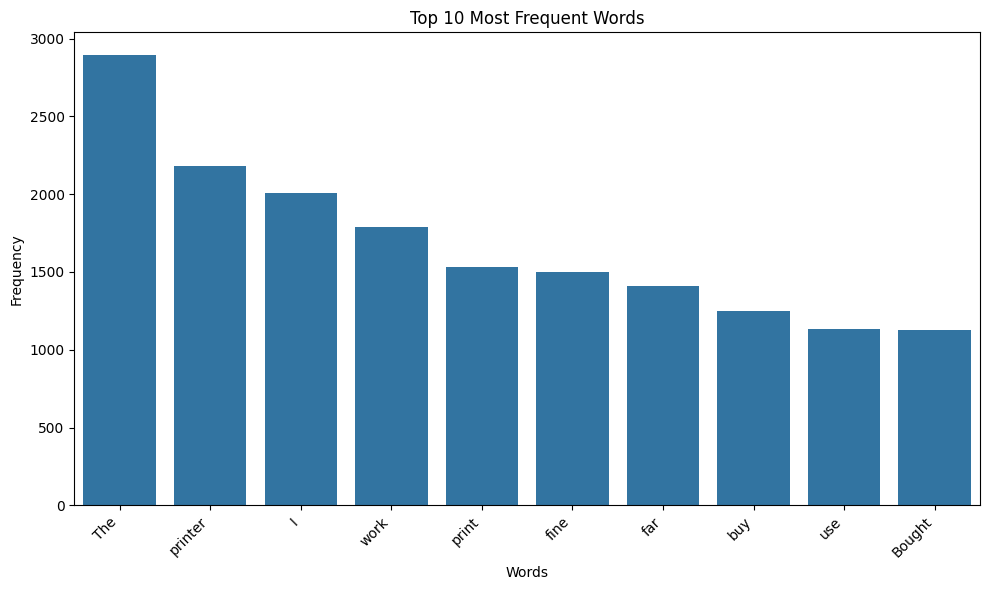

In [108]:
from collections import Counter

# Flatten the list of cleaned words
all_cleaned_words = [word for sublist in data['cleaned_review'] for word in sublist]
# Perform word frequency analysis
word_counts = Counter(all_cleaned_words)
# Display the top N most common words (top 10)
top_n = 10
print(f"Top {top_n} most common words:")
for word, count in word_counts.most_common(top_n):
    print(f"{word}: {count}")
word_freq_df = pd.DataFrame.from_dict(word_counts, orient='index', columns=['Frequency'])
word_freq_df = word_freq_df.sort_values(by='Frequency', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=word_freq_df.head(top_n).index, y=word_freq_df.head(top_n)['Frequency'])
plt.title(f'Top {top_n} Most Frequent Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

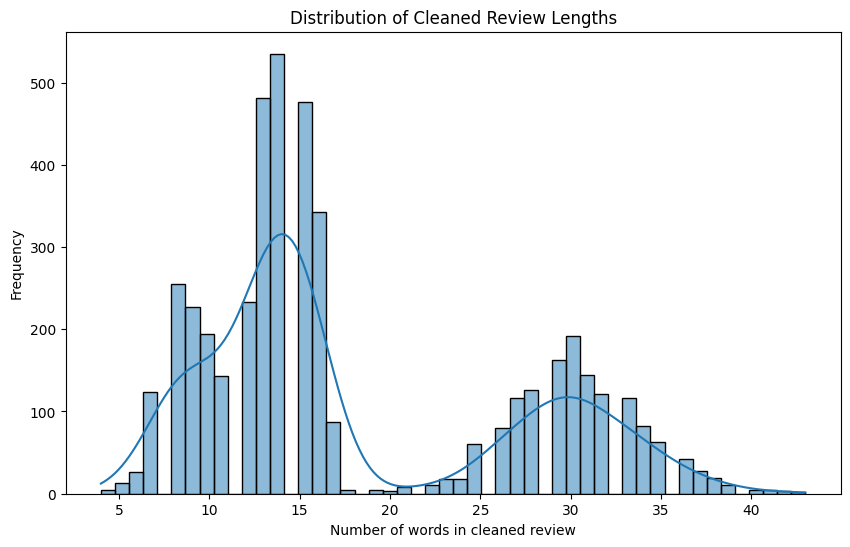


Summary statistics for cleaned review length:
count    4582.000000
mean       18.089917
std         8.798094
min         4.000000
25%        12.000000
50%        15.000000
75%        27.000000
max        43.000000
Name: cleaned_review_length, dtype: float64


In [109]:

# Calculate the length of cleaned reviews
data['cleaned_review_length'] = data['cleaned_review'].apply(len)
# Plot the distribution of review lengths
plt.figure(figsize=(10, 6))
sns.histplot(data['cleaned_review_length'], bins=50, kde=True)
plt.title('Distribution of Cleaned Review Lengths')
plt.xlabel('Number of words in cleaned review')
plt.ylabel('Frequency')
plt.show()
# Display some summary statistics for review length
print("\nSummary statistics for cleaned review length:")
print(data['cleaned_review_length'].describe())

In [110]:
positive_phrases = {
    "highly recommend", "excellent support", "great value", "super fast", "love it",
    "perfect for", "well worth", "exceeded expectations", "easy setup", "fast delivery",
    "not bad", "good to use", "works well", "no issues", "setup was simple", "print quality is good"
}

negative_phrases = {
    "does not work", "not working", "worst ever", "complete waste", "paper jam",
    "terrible experience", "too noisy", "won't connect", "very slow", "bad support",
    "keep crashing", "disappointed", "poor quality", "not satisfied", "hard to use",
    "would not recommend", "never buying again", "setup nightmare", "printer jam",
    "connectivity issue", "not good", "expected more", "not impressed", "could be better","too worst","too bad","totally hell"
}

strong_positive = {"excellent", "amazing", "love", "perfect", "impressive", "outstanding"}
strong_negative = {"worst", "terrible", "hate", "awful", "disgusting", "useless"}

positive_keywords = {
    "good", "great", "excellent", "amazing", "fast", "easy", "love", "nice",
    "clear", "smooth", "affordable", "impressive", "useful", "quick", "reliable"
}

negative_keywords = {
    "bad", "worst", "slow", "disappointing", "poor", "confusing", "frustrating",
    "noisy", "terrible", "difficult", "issue", "broken", "problem", "waste",
    "jam", "disconnect", "failed", "trouble", "error", "support", "inconvenient","worst"
}

negation_words = {"not", "no", "never", "none", "n't", "hardly", "barely", "wouldn't", "couldn't", "may","not that much"}

#manual sentiment analyzer
def manual_sentiment_analyzer(text):
    if isinstance(text, list):
        text = " ".join(text)
    text = text.lower()
    tokens = word_tokenize(text)
    pos_tags = pos_tag(tokens)

    score = 0
    negate = False
    neg_index = -5
    negate_window = 4

    # Phrase matches (stronger weights)
    for phrase in negative_phrases:
        if phrase in text:
            score -= 3
    for phrase in positive_phrases:
        if phrase in text:
            score += 3

    for i, (word, tag) in enumerate(pos_tags):
        if word in negation_words:
            negate = True
            neg_index = i
            continue

        is_negating = negate and (i - neg_index <= negate_window)
        weight = 2 if tag.startswith(('JJ', 'RB')) else 1

        # Strong word weight
        if word in strong_positive:
            score += 3 if not is_negating else -3
        elif word in strong_negative:
            score -= 3 if not is_negating else 3
        elif word in positive_keywords:
            score += weight if not is_negating else -weight
        elif word in negative_keywords:
            score -= weight if not is_negating else weight

        # Reset negation flag
        if i - neg_index > negate_window:
            negate = False

    # Adjusted classification thresholds
    if score >= 1:
        return 'Positive'
    elif score <= -1:
        return 'Negative'
    else:
        return 'Neutral'
data['rule_based_sentiment'] = data['cleaned_review'].apply(manual_sentiment_analyzer)
data['rule_based_sentiment'].value_counts()

,count
rule_based_sentiment,
Neutral,2184
Positive,1327
Negative,1071


In [111]:
data.head()

,review_text,product_name,re_review,token_review,removed_stopwords,cleaned_review,cleaned_review_length,rule_based_sentiment
0,I had no issues when it prints in high resolut...,HP Envy 6055e Wireless Color Printer,I had no issues when it prints in high resolut...,"[I, had, no, issues, when, it, prints, in, hig...","[I, issues, prints, high, resolution, perfect,...","[I, issue, print, high, resolution, perfect, d...",13,Positive
1,Been using it since July and it’s been I regre...,HP Smart Tank 500 All-in-One,Been using it since July and its been I regret...,"[Been, using, it, since, July, and, its, been,...","[Been, using, since, July, I, regret, purchase]","[Been, use, since, July, I, regret, purchase]",7,Neutral
2,Got this printer during a truth sale. It barel...,HP Envy 6055e Wireless Color Printer,Got this printer during a truth sale It barely...,"[Got, this, printer, during, a, truth, sale, I...","[Got, printer, truth, sale, It, barely, functi...","[Got, printer, truth, sale, It, barely, functi...",9,Neutral
3,It performs excellently when it runs quietly w...,HP Smart Tank 500 All-in-One,It performs excellently when it runs quietly w...,"[It, performs, excellently, when, it, runs, qu...","[It, performs, excellently, runs, quietly, sol...","[It, perform, excellently, run, quietly, solid...",14,Neutral
4,I had no issues when it supports wireless prin...,HP Smart Tank 500 All-in-One,I had no issues when it supports wireless prin...,"[I, had, no, issues, when, it, supports, wirel...","[I, issues, supports, wireless, printing, effo...","[I, issue, support, wireless, print, effortles...",14,Positive


In [112]:
!pip install fasttext

In [138]:
!pip install -U imblearn

In [113]:
import fasttext
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import torch
# Recreate the 'rule_based_sentiment_encoded' column
le = LabelEncoder()
data['rule_based_sentiment_encoded'] = le.fit_transform(data['rule_based_sentiment'])

# Save the cleaned review text to a temporary file in the required fastText format
temp_file_path = "/tmp/reviews.txt"
with open(temp_file_path, "w") as f:
    for review in data['cleaned_review']:
        # Join the list of words back into a string for FastText
        f.write(" ".join(review) + "\n")

# Train a fastText model with tunable hyperparameters
tuned_model = fasttext.train_unsupervised(temp_file_path, model='skipgram', dim=300, epoch=20, lr=0.1)

# Recreate the 'fasttext_embedding_tuned' column
data['fasttext_embedding_tuned'] = data['cleaned_review'].apply(lambda x: tuned_model.get_sentence_vector(" ".join(x)))

# Define the input features X as the FastText embeddings
# Convert the list of arrays in the 'fasttext_embedding_tuned' column to a NumPy array
X_fasttext = np.vstack(data['fasttext_embedding_tuned'].values)
# Define the target variable y (using the encoded rule-based sentiment)
y_fasttext = data['rule_based_sentiment_encoded']

In [114]:
X_train_fasttext, X_test_fasttext, y_train_fasttext, y_test_fasttext = train_test_split(
    X_fasttext, y_fasttext, test_size=0.2, random_state=42, stratify=y_fasttext
)

In [140]:
# Perform Borderline-Smote on the *training* data only
from imblearn.over_sampling import BorderlineSMOTE
ros = BorderlineSMOTE(random_state=42) #adv version of SMOTE
X_train_resampled_fasttext, y_train_resampled_fasttext = ros.fit_resample(X_train_fasttext, y_train_fasttext)

print("Distribution after Borderline-SMote (on training data):")
print(y_train_resampled_fasttext.value_counts())

# The testing data remains the original, unsampled data
X_test_resampled_fasttext = X_test_fasttext
y_test_resampled_fasttext = y_test_fasttext

Distribution after Borderline-SMote (on training data):
rule_based_sentiment_encoded
0    1747
2    1747
1    1747
Name: count, dtype: int64


In [141]:
# Convert the training and testing data into PyTorch tensors
X_train_resampled_fasttext_tensor = torch.tensor(X_train_resampled_fasttext, dtype=torch.float32)
X_test_resampled_fasttext_tensor = torch.tensor(X_test_resampled_fasttext, dtype=torch.float32)
y_train_resampled_fasttext_tensor = torch.tensor(y_train_resampled_fasttext.values, dtype=torch.long)
y_test_resampled_fasttext_tensor = torch.tensor(y_test_resampled_fasttext.values, dtype=torch.long)

# Print the shapes of the training and testing feature tensors
print("\nShape of X_train_resampled_fasttext_tensor:", X_train_resampled_fasttext_tensor.shape)
print("Shape of X_test_resampled_fasttext_tensor:", X_test_resampled_fasttext_tensor.shape)
print("Shape of y_train_resampled_fasttext_tensor:", y_train_resampled_fasttext_tensor.shape)
print("Shape of y_test_resampled_fasttext_tensor:", y_test_resampled_fasttext_tensor.shape)


Shape of X_train_resampled_fasttext_tensor: torch.Size([5241, 300])
Shape of X_test_resampled_fasttext_tensor: torch.Size([917, 300])
Shape of y_train_resampled_fasttext_tensor: torch.Size([5241])
Shape of y_test_resampled_fasttext_tensor: torch.Size([917])


In [142]:
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np


In [143]:
# Define the Dataset class
class ReviewDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# Create Dataset objects for the resampled FastText data
train_ds_resampled_fasttext = ReviewDataset(X_train_resampled_fasttext_tensor, y_train_resampled_fasttext_tensor)
test_ds_resampled_fasttext = ReviewDataset(X_test_resampled_fasttext_tensor, y_test_resampled_fasttext_tensor)

# Create PyTorch DataLoader objects for the resampled FastText data
train_loader_resampled_fasttext = DataLoader(train_ds_resampled_fasttext, batch_size=32, shuffle=True)
test_loader_resampled_fasttext = DataLoader(test_ds_resampled_fasttext, batch_size=32)

print("FastText DataLoaders created.")

FastText DataLoaders created.


In [144]:
class LSTMClassifier(nn.Module):
    def __init__(self, embedding_dim, hidden_dim, num_layers):
        super(LSTMClassifier, self).__init__()
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, 3)

    def forward(self, x):
        x = x.unsqueeze(1)
        out, _ = self.lstm(x)
        # Access the output for the single time step
        out = out[:, -1, :]  # last hidden state
        return self.fc(out)

In [145]:
class GRUClassifier(nn.Module):
    def __init__(self, embedding_dim, hidden_dim, num_layers):
        super(GRUClassifier, self).__init__()
        self.gru = nn.GRU(embedding_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, 3)

    def forward(self, x):
        x = x.unsqueeze(1)
        out, _ = self.gru(x)
        # Access the output for the single time step
        out = out[:, -1, :]
        return self.fc(out)


In [146]:
class BiLSTMClassifier(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super().__init__()
        self.lstm = nn.LSTM(input_dim, hidden_dim, bidirectional=True, batch_first=True)
        self.fc = nn.Linear(hidden_dim * 2, 3)

    def forward(self, x):
        x = x.unsqueeze(1)
        _, (hn, _) = self.lstm(x)
        return self.fc(torch.cat((hn[0], hn[1]), dim=1))

In [147]:
def train_model(model, train_loader, val_loader, criterion, epochs=20):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = model.to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
    train_losses, val_losses = [], []
    train_accuracies, val_accuracies = [], []
    for epoch in range(epochs):
        model.train()
        total_loss, correct = 0, 0
        for X_batch, y_batch in train_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
            correct += (outputs.argmax(1) == y_batch).sum().item()

        train_acc = correct / len(train_loader.dataset)
        train_losses.append(total_loss)
        train_accuracies.append(train_acc)
        # Validation phase
        model.eval()
        val_loss, correct_val = 0, 0
        with torch.no_grad():
            for X_val, y_val in val_loader:
                X_val, y_val = X_val.to(device), y_val.to(device)
                outputs = model(X_val)
                loss = criterion(outputs, y_val)
                val_loss += loss.item()
                correct_val += (outputs.argmax(1) == y_val).sum().item()

        val_acc = correct_val / len(val_loader.dataset)
        val_losses.append(val_loss)
        val_accuracies.append(val_acc)
        print(f"Epoch {epoch+1}: Train Loss={total_loss:.3f}, Val Loss={val_loss:.3f}, Train Acc={train_acc:.3f}, Val Acc={val_acc:.3f}")
    # Evaluation
    model.eval()
    y_true, y_pred = [], []
    with torch.no_grad():
        for X_batch, y_batch in val_loader:
            X_batch = X_batch.to(device)
            outputs = model(X_batch)
            y_pred.extend(outputs.argmax(1).cpu().numpy())
            y_true.extend(y_batch.numpy())
    from sklearn.metrics import classification_report
    print(classification_report(y_true, y_pred))
    # Plot Loss and Accuracy
    plot_metrics(train_losses, val_losses, train_accuracies, val_accuracies, model.__class__.__name__)
    return y_true, y_pred


In [148]:
def plot_metrics(train_losses, val_losses, train_accs, val_accs, model_name):
    import matplotlib.pyplot as plt

    epochs = range(1, len(train_losses) + 1)

    plt.figure(figsize=(14, 5))

    # Loss Plot
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_losses, label='Training Loss')
    plt.plot(epochs, val_losses, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title(f'{model_name} - Loss Curve')
    plt.legend()

    # Accuracy Plot
    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_accs, label='Training Accuracy')
    plt.plot(epochs, val_accs, label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title(f'{model_name} - Accuracy Curve')
    plt.legend()

    plt.tight_layout()
    plt.show()


Training LSTM_fasttext with Resampled 3-Class FastText Data
Epoch 1: Train Loss=167.577, Val Loss=22.733, Train Acc=0.451, Val Acc=0.611
Epoch 2: Train Loss=109.436, Val Loss=15.177, Train Acc=0.706, Val Acc=0.779
Epoch 3: Train Loss=83.686, Val Loss=14.005, Train Acc=0.792, Val Acc=0.786
Epoch 4: Train Loss=73.070, Val Loss=11.692, Train Acc=0.823, Val Acc=0.821
Epoch 5: Train Loss=66.732, Val Loss=11.556, Train Acc=0.841, Val Acc=0.832
Epoch 6: Train Loss=62.771, Val Loss=10.159, Train Acc=0.853, Val Acc=0.852
Epoch 7: Train Loss=58.782, Val Loss=11.258, Train Acc=0.858, Val Acc=0.823
Epoch 8: Train Loss=54.822, Val Loss=9.615, Train Acc=0.870, Val Acc=0.859
Epoch 9: Train Loss=52.241, Val Loss=9.373, Train Acc=0.874, Val Acc=0.859
Epoch 10: Train Loss=49.481, Val Loss=9.210, Train Acc=0.881, Val Acc=0.867
Epoch 11: Train Loss=46.585, Val Loss=10.086, Train Acc=0.893, Val Acc=0.858
Epoch 12: Train Loss=43.977, Val Loss=8.332, Train Acc=0.901, Val Acc=0.883
Epoch 13: Train Loss=42.12

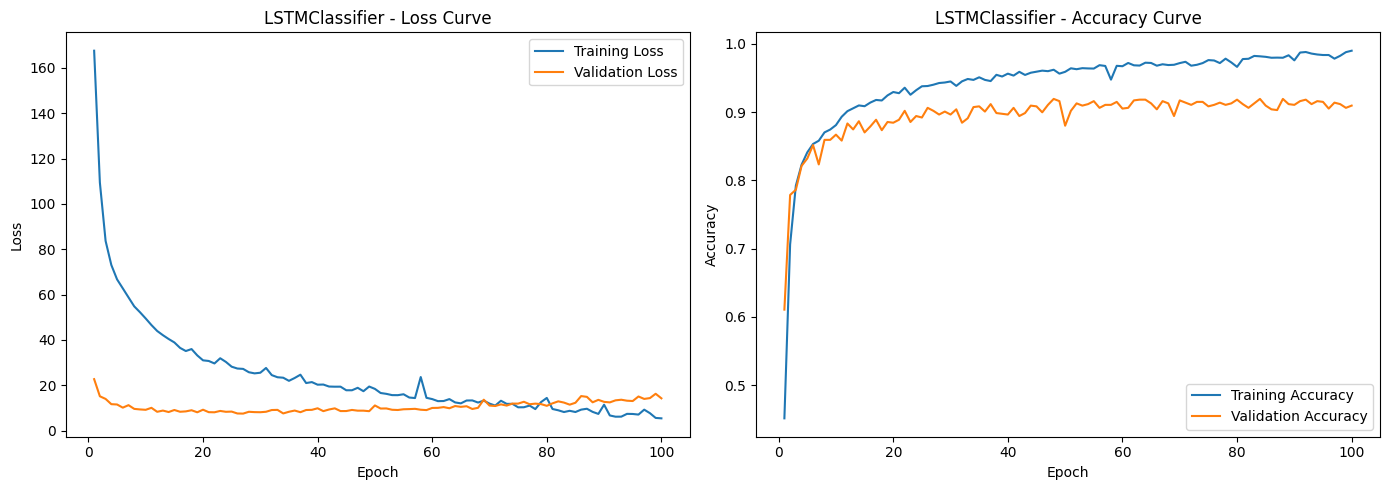

Could not calculate AUC-ROC for LSTM_fasttext: Target scores need to be probabilities for multiclass roc_auc, i.e. they should sum up to 1.0 over classes


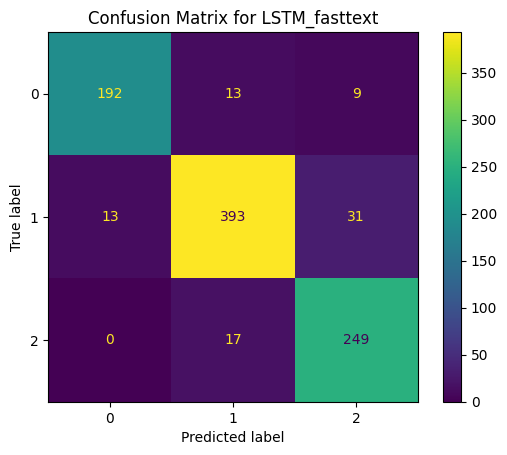


Training GRU_fasttext with Resampled 3-Class FastText Data
Epoch 1: Train Loss=151.642, Val Loss=20.035, Train Acc=0.519, Val Acc=0.651
Epoch 2: Train Loss=92.346, Val Loss=13.750, Train Acc=0.765, Val Acc=0.798
Epoch 3: Train Loss=74.666, Val Loss=12.870, Train Acc=0.816, Val Acc=0.808
Epoch 4: Train Loss=67.210, Val Loss=12.024, Train Acc=0.840, Val Acc=0.817
Epoch 5: Train Loss=61.194, Val Loss=11.917, Train Acc=0.860, Val Acc=0.832
Epoch 6: Train Loss=57.896, Val Loss=11.417, Train Acc=0.867, Val Acc=0.841
Epoch 7: Train Loss=55.290, Val Loss=11.137, Train Acc=0.869, Val Acc=0.840
Epoch 8: Train Loss=50.870, Val Loss=10.492, Train Acc=0.881, Val Acc=0.845
Epoch 9: Train Loss=48.619, Val Loss=9.311, Train Acc=0.887, Val Acc=0.869
Epoch 10: Train Loss=45.512, Val Loss=11.918, Train Acc=0.892, Val Acc=0.829
Epoch 11: Train Loss=44.582, Val Loss=8.905, Train Acc=0.893, Val Acc=0.872
Epoch 12: Train Loss=42.100, Val Loss=8.264, Train Acc=0.897, Val Acc=0.880
Epoch 13: Train Loss=39.182

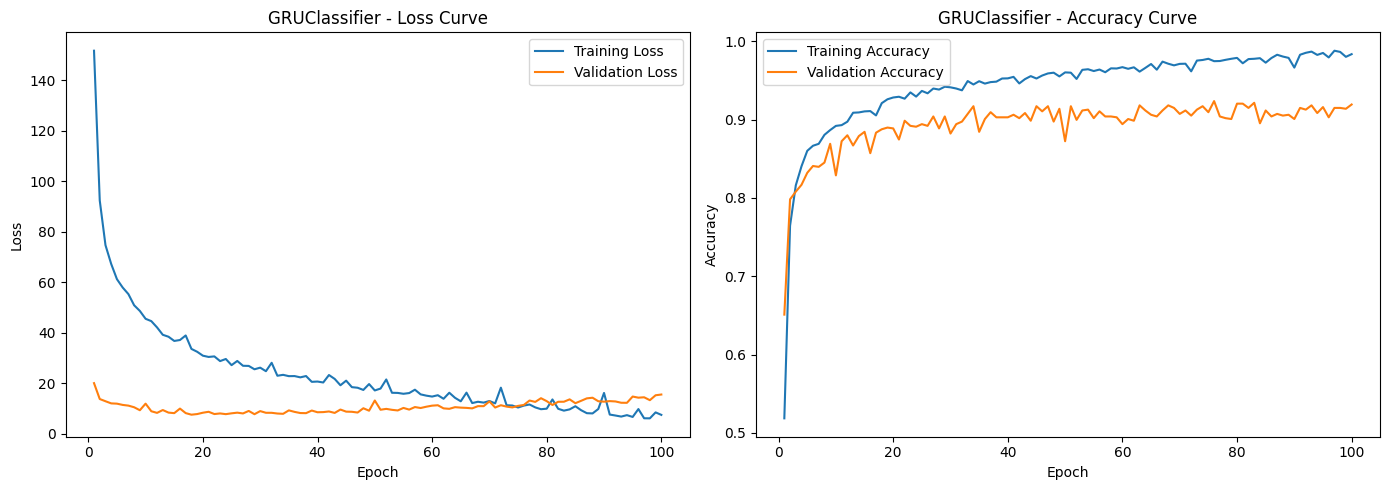

Could not calculate AUC-ROC for GRU_fasttext: Target scores need to be probabilities for multiclass roc_auc, i.e. they should sum up to 1.0 over classes


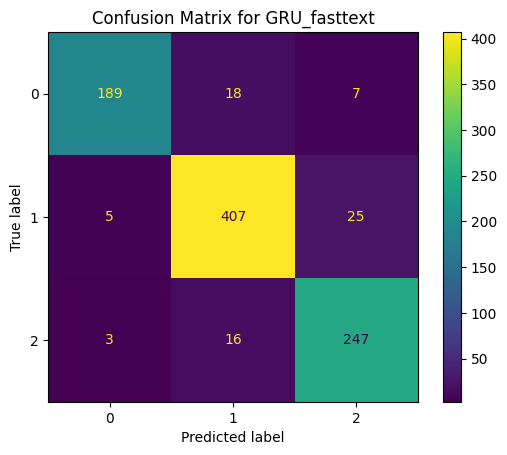


Training BiLSTM_fasttext with Resampled 3-Class FastText Data
Epoch 1: Train Loss=162.370, Val Loss=23.483, Train Acc=0.540, Val Acc=0.639
Epoch 2: Train Loss=115.830, Val Loss=17.995, Train Acc=0.699, Val Acc=0.730
Epoch 3: Train Loss=94.074, Val Loss=14.870, Train Acc=0.760, Val Acc=0.793
Epoch 4: Train Loss=83.025, Val Loss=13.160, Train Acc=0.800, Val Acc=0.827
Epoch 5: Train Loss=76.421, Val Loss=12.293, Train Acc=0.818, Val Acc=0.838
Epoch 6: Train Loss=73.022, Val Loss=12.017, Train Acc=0.830, Val Acc=0.835
Epoch 7: Train Loss=69.197, Val Loss=13.363, Train Acc=0.844, Val Acc=0.819
Epoch 8: Train Loss=66.594, Val Loss=11.704, Train Acc=0.849, Val Acc=0.842
Epoch 9: Train Loss=64.057, Val Loss=11.750, Train Acc=0.856, Val Acc=0.839
Epoch 10: Train Loss=62.174, Val Loss=11.522, Train Acc=0.861, Val Acc=0.838
Epoch 11: Train Loss=60.207, Val Loss=10.503, Train Acc=0.863, Val Acc=0.860
Epoch 12: Train Loss=57.695, Val Loss=10.514, Train Acc=0.874, Val Acc=0.858
Epoch 13: Train Loss

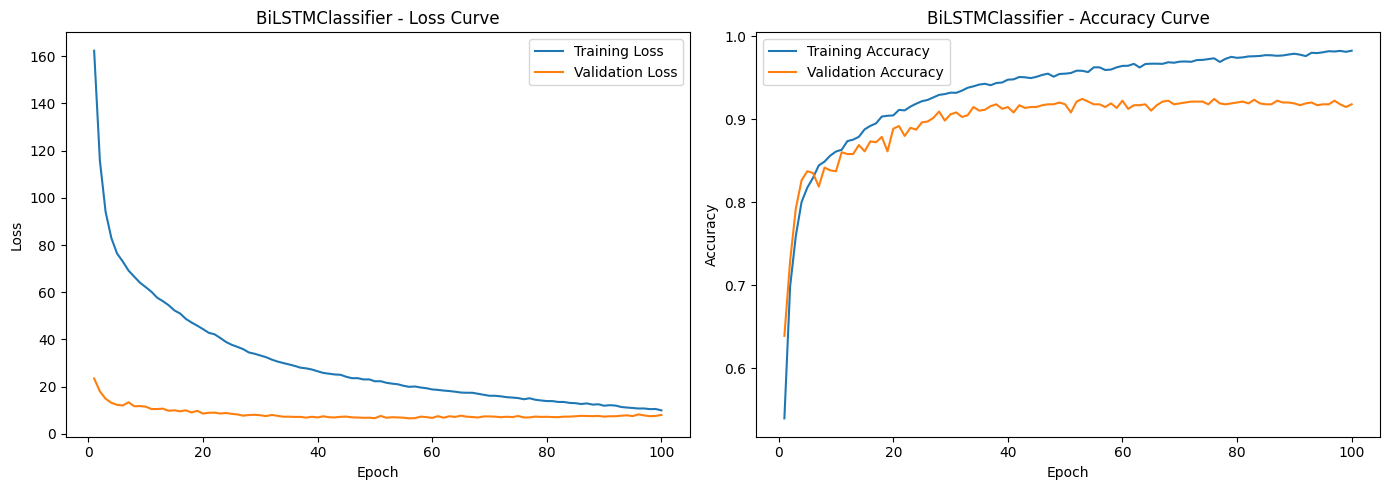

Could not calculate AUC-ROC for BiLSTM_fasttext: Target scores need to be probabilities for multiclass roc_auc, i.e. they should sum up to 1.0 over classes


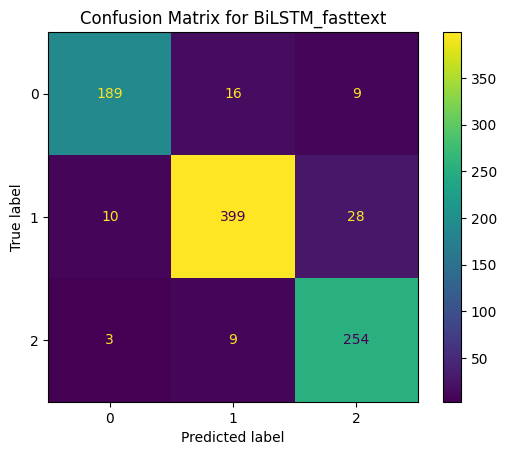

In [150]:
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_auc_score
fasttext_input_dim = X_train_resampled_fasttext_tensor.shape[1]
output_dim_3class = 3
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
models_fasttext = {
    "LSTM_fasttext": LSTMClassifier(fasttext_input_dim, 64, output_dim_3class),
    "GRU_fasttext": GRUClassifier(fasttext_input_dim, 64, output_dim_3class),
    "BiLSTM_fasttext": BiLSTMClassifier(fasttext_input_dim, 64, output_dim_3class),
}
# Calculate class weights for the resampled 3-class FastText data
class_weights_fasttext = compute_class_weight('balanced', classes=np.unique(y_train_resampled_fasttext), y=y_train_resampled_fasttext)
class_weights_fasttext_tensor = torch.tensor(class_weights_fasttext, dtype=torch.float32).to(device)
# Define the loss function with class weights
criterion_fasttext = nn.CrossEntropyLoss(weight=class_weights_fasttext_tensor)
# Train each model using the FastText data loaders and the defined criterion
for name, model in models_fasttext.items():
    print(f"\nTraining {name} with Resampled 3-Class FastText Data")
    # Train the model and get predictions
    y_true, y_pred = train_model(
        model,
        train_loader_resampled_fasttext,
        test_loader_resampled_fasttext,
        criterion_fasttext,
        epochs=100
    )
    # Calculate and print AUC-ROC
    # Note: AUC-ROC for multi-class is calculated differently (e.g., one-vs-rest or one-vs-one)
    # We'll use the one-vs-rest approach here.
    try:
        auc_roc = roc_auc_score(y_true, model(torch.tensor(X_test_resampled_fasttext, dtype=torch.float32).to(device)).detach().cpu().numpy(), multi_class='ovr')
        print(f"AUC-ROC for {name}: {auc_roc:.3f}")
    except ValueError as e:
        print(f"Could not calculate AUC-ROC for {name}: {e}")

    # Plot confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(f'Confusion Matrix for {name}')
    plt.show()

In [133]:
import pickle
from sklearn.metrics import classification_report
import torch
import numpy as np
# Assuming GRU_fasttext performed best based on the previous training outputs
best_model = models_fasttext["BiLSTM_fasttext"]

# Save the best model to a pickle file
model_filename = "BiLSTM_fasttext.pkl"
with open(model_filename, 'wb') as f:
    pickle.dump(best_model, f)

print(f"Best model saved to {model_filename}")

# Load the saved model
with open(model_filename, 'rb') as f:
    loaded_model = pickle.load(f)

print(f"Model loaded from {model_filename}")

# Test the loaded model on the test data
loaded_model.eval()
y_true_loaded, y_pred_loaded = [], []
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
loaded_model.to(device)

with torch.no_grad():
    for X_batch, y_batch in test_loader_resampled_fasttext:
        X_batch = X_batch.to(device)
        outputs = loaded_model(X_batch)
        y_pred_loaded.extend(outputs.argmax(1).cpu().numpy())
        y_true_loaded.extend(y_batch.numpy())

# Print classification report for the loaded model
print("\nClassification Report for Loaded Model:")
print(classification_report(y_true_loaded, y_pred_loaded))

Best model saved to BiLSTM_fasttext.pkl
Model loaded from BiLSTM_fasttext.pkl

Classification Report for Loaded Model:
              precision    recall  f1-score   support

           0       0.94      0.91      0.92       214
           1       0.95      0.91      0.93       437
           2       0.87      0.95      0.90       266

    accuracy                           0.92       917
   macro avg       0.92      0.92      0.92       917
weighted avg       0.92      0.92      0.92       917



In [135]:
import re
import torch
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from sklearn.preprocessing import LabelEncoder

# Initialize label encoder
le = LabelEncoder()
le.fit(["negative", "neutral", "positive"])

def get_wordnet_pos(tag):
    """Map POS tag to a format recognized by WordNetLemmatizer."""
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

def predict_sentiment(user_review, tuned_model, loaded_model, device, stop_words):
    # Lowercase
    processed_review = user_review.lower()

    # Remove punctuation
    processed_review = re.sub(r'[^\w\s]', '', processed_review)

    # Tokenize
    tokens = word_tokenize(processed_review)

    # Remove stopwords
    filtered_tokens = [word for word in tokens if word not in stop_words]

    # Lemmatize with POS tagging
    lemmatizer = WordNetLemmatizer()
    pos_tags = pos_tag(filtered_tokens)
    cleaned_review = [lemmatizer.lemmatize(word, get_wordnet_pos(tag)) for word, tag in pos_tags]

    # Generate FastText embedding
    review_embedding = tuned_model.get_sentence_vector(" ".join(cleaned_review))

    # Convert to tensor
    tensor_embedding = torch.tensor(review_embedding, dtype=torch.float32).unsqueeze(0).to(device)

    # Model prediction
    loaded_model.eval()
    with torch.no_grad():
        output = loaded_model(tensor_embedding)
        predicted_class_index = output.argmax(1).item()

    # Decode label
    predicted_sentiment = le.inverse_transform([predicted_class_index])[0]

    return predicted_sentiment

words = set(stopwords.words('english'))
review = input("Enter a review: ")
sentiment = predict_sentiment(review, tuned_model, loaded_model, device, words)
print(f"Predicted Sentiment: {sentiment}")


Enter a review: Worst printer ever, total waste of money.
Predicted Sentiment: positive


In [151]:
_, X_test_fasttext_original, _, y_test_fasttext_original = train_test_split(
    data['fasttext_embedding_tuned'], data['rule_based_sentiment_encoded'], test_size=0.2, random_state=42, stratify=data['rule_based_sentiment_encoded']
)

# Get the original reviews for the test set using the indices from the split
test_reviews = data.loc[X_test_fasttext_original.index, 'review_text']
test_cleaned_reviews = data.loc[X_test_fasttext_original.index, 'cleaned_review']
test_true_sentiment_encoded = y_test_fasttext_original
test_true_sentiment_labels = le.inverse_transform(test_true_sentiment_encoded)
predicted_sentiment_labels = le.inverse_transform(y_pred)


# Create a DataFrame to easily compare true and predicted labels with reviews
misclassification_df = pd.DataFrame({
    'Original_Review': test_reviews,
    'Cleaned_Review': test_cleaned_reviews,
    'True_Sentiment': test_true_sentiment_labels,
    'Predicted_Sentiment': predicted_sentiment_labels
})

# Filter for misclassified reviews
misclassified_reviews = misclassification_df[misclassification_df['True_Sentiment'] != misclassification_df['Predicted_Sentiment']]

print("Misclassified Reviews:")
display(misclassified_reviews)

Misclassified Reviews:


,Original_Review,Cleaned_Review,True_Sentiment,Predicted_Sentiment
2379,Frequent paper jams ruin the user experience. ...,"[Frequent, paper, jam, ruin, user, experience,...",negative,positive
3766,"Had issues connecting via environmental, but e...","[Had, issue, connect, via, environmental, even...",negative,neutral
4768,The noise level during printing is higher than...,"[The, noise, level, print, high, expect, We, t...",negative,neutral
4234,The compact design fits perfectly on small des...,"[The, compact, design, fit, perfectly, small, ...",positive,neutral
1455,Wireless performance is good most of the time ...,"[Wireless, performance, good, time, occasional...",negative,neutral
...,...,...,...,...
2972,The printer occasionally jams when using thick...,"[The, printer, occasionally, jam, use, thick, ...",neutral,negative
4243,The mobile printing option works flawlessly wi...,"[The, mobile, printing, option, work, flawless...",positive,neutral
719,The scanner lid feels flimsy and doesn't close...,"[The, scanner, lid, feel, flimsy, doesnt, clos...",neutral,positive
1868,"Software installation works, but the drivers c...","[Software, installation, work, driver, bit, he...",negative,positive


## So the above models metrics are good but coming to the classification performs very bad. So, i decided to going for advanced model: **BERT**

In [161]:
!pip install transformers torch

## Load pre-trained bert model and tokenizer

In [162]:
from transformers import BertModel, BertTokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = BertModel.from_pretrained('bert-base-uncased')
print("BERT tokenizer and model loaded successfully.")

BERT tokenizer and model loaded successfully.


## Prepare data for bert

In [163]:
# Access the 'cleaned_review' column
reviews = data['cleaned_review']

# Tokenize the reviews and get input IDs and attention masks
# BERT has a max sequence length of 512
max_len = 128 # Choose a max length
encoded_reviews = tokenizer.batch_encode_plus(
    reviews.apply(lambda x: " ".join(x)).tolist(),
    max_length=max_len,
    padding='max_length',
    truncation=True,
    return_attention_mask=True,
    return_tensors='pt' # Return PyTorch tensors
)

# Extract input IDs and attention masks
input_ids = encoded_reviews['input_ids']
attention_masks = encoded_reviews['attention_mask']

print("Input tensors created successfully.")
print("Shape of input_ids:", input_ids.shape)
print("Shape of attention_masks:", attention_masks.shape)

Input tensors created successfully.
Shape of input_ids: torch.Size([4582, 128])
Shape of attention_masks: torch.Size([4582, 128])


## Split data


In [170]:
from sklearn.model_selection import train_test_split
train_input_ids, test_input_ids, train_attention_masks, test_attention_masks, y_train_bert, y_test_bert = train_test_split(
    input_ids,
    attention_masks,
    y_fasttext,
    test_size=0.2,
    random_state=42,
    stratify=y_fasttext
)

# Reset the index of the label Series
y_train_bert = y_train_bert.reset_index(drop=True)
y_test_bert = y_test_bert.reset_index(drop=True)


print("Data split into training and testing sets.")
print("Shape of train_input_ids:", train_input_ids.shape)
print("Shape of test_input_ids:", test_input_ids.shape)
print("Shape of train_attention_masks:", train_attention_masks.shape)
print("Shape of test_attention_masks:", test_attention_masks.shape)
print("Shape of y_train_bert:", y_train_bert.shape)
print("Shape of y_test_bert:", y_test_bert.shape)

Data split into training and testing sets.
Shape of train_input_ids: torch.Size([3665, 128])
Shape of test_input_ids: torch.Size([917, 128])
Shape of train_attention_masks: torch.Size([3665, 128])
Shape of test_attention_masks: torch.Size([917, 128])
Shape of y_train_bert: (3665,)
Shape of y_test_bert: (917,)


## PyTorch Datasets and DataLoaders

Create custom PyTorch Dataset and DataLoader objects for the prepared data.

In [172]:
from torch.utils.data import Dataset, DataLoader
import numpy as np

class SentimentDataset(Dataset):
    def __init__(self, input_ids, attention_masks, labels):
        self.input_ids = input_ids
        self.attention_masks = attention_masks
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return {
            'input_ids': self.input_ids[idx],
            'attention_mask': self.attention_masks[idx],
            'labels': self.labels[idx]
        }

# Create Dataset objects
train_dataset = SentimentDataset(train_input_ids, train_attention_masks, y_train_bert.values) # Convert Series to NumPy array
test_dataset = SentimentDataset(test_input_ids, test_attention_masks, y_test_bert.values) # Convert Series to NumPy array


# Create DataLoader objects
batch_size = 16 # You can adjust this batch size
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size)

print("PyTorch Datasets and DataLoaders created.")

PyTorch Datasets and DataLoaders created.


## Define BERT-based Sentiment Classifier

In [166]:
import torch.nn as nn
from transformers import BertModel

class BERTClassifier(nn.Module):
    def __init__(self, bert_model, num_classes):
        super(BERTClassifier, self).__init__()
        self.bert = bert_model
        self.dropout = nn.Dropout(0.1) # Add dropout for regularization
        self.linear = nn.Linear(self.bert.config.hidden_size, num_classes)

    def forward(self, input_ids, attention_mask):
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        # Get the [CLS] token output (usually the first token) for classification
        cls_output = outputs.last_hidden_state[:, 0, :]
        cls_output = self.dropout(cls_output)
        logits = self.linear(cls_output)
        return logits

# Instantiate the model
num_classes = 3 # For positive, neutral, negative
bert_classifier = BERTClassifier(bert_model, num_classes)

print("BERT-based Sentiment Classifier model defined.")

BERT-based Sentiment Classifier model defined.


## Fine-tune BERT Model

Train the BERT-based sentiment classifier on the training data, fine-tuning the pre-trained BERT layers for the sentiment analysis task.

In [173]:
from transformers import get_linear_schedule_with_warmup
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler
from sklearn.metrics import classification_report, roc_auc_score
import numpy as np
import torch
import torch.optim as optim

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
bert_classifier.to(device)

# Optimizer and learning rate scheduler
optimizer = optim.Adam(bert_classifier.parameters(), lr=2e-5)
epochs = 4

# Total number of training steps
total_steps = len(train_dataloader) * epochs

# Create the learning rate scheduler
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=total_steps)

# Loss function (using class weights if needed)
# We can reuse the class_weights_fasttext_tensor calculated earlier
criterion = nn.CrossEntropyLoss(weight=class_weights_fasttext_tensor)


# Training loop
print("Starting BERT model fine-tuning...")

for epoch in range(epochs):
    print(f"\n======== Epoch {epoch + 1}/{epochs} =========")
    bert_classifier.train()
    total_train_loss = 0

    for step, batch in enumerate(train_dataloader):
        # Move batch to GPU if available
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        # Clear previous gradients
        bert_classifier.zero_grad()

        # Forward pass
        outputs = bert_classifier(input_ids, attention_mask)
        loss = criterion(outputs, labels)
        total_train_loss += loss.item()

        # Backward pass and optimize
        loss.backward()
        torch.nn.utils.clip_grad_norm_(bert_classifier.parameters(), 1.0) # Clip gradients to prevent exploding gradients
        optimizer.step()
        scheduler.step() # Update learning rate

        # Print training progress
        if step % 100 == 0 and not step == 0:
            print(f'  Batch {step} of {len(train_dataloader)}. Loss: {loss.item():.4f}')

    # Calculate average training loss
    avg_train_loss = total_train_loss / len(train_dataloader)
    print(f"\nAverage training loss: {avg_train_loss:.4f}")

    # Evaluation after each epoch
    print("\nRunning validation...")
    bert_classifier.eval()
    y_true_val, y_pred_val, y_prob_val = [], [], []
    total_eval_loss = 0

    with torch.no_grad():
        for batch in test_dataloader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            outputs = bert_classifier(input_ids, attention_mask)
            loss = criterion(outputs, labels)
            total_eval_loss += loss.item()

            logits = outputs.detach().cpu().numpy()
            label_ids = labels.to('cpu').numpy()

            y_pred_val.extend(np.argmax(logits, axis=1))
            y_true_val.extend(label_ids)
            y_prob_val.extend(logits) # Store logits for AUC-ROC

    avg_eval_loss = total_eval_loss / len(test_dataloader)
    print(f"Average validation loss: {avg_eval_loss:.4f}")

    # Calculate evaluation metrics
    report = classification_report(y_true_val, y_pred_val, output_dict=True)
    print("\nValidation Classification Report:")
    print(classification_report(y_true_val, y_pred_val))

    # Calculate AUC-ROC (one-vs-rest)
    try:
        # Convert logits to probabilities using softmax
        y_prob_val = torch.softmax(torch.tensor(y_prob_val), dim=1).numpy()
        auc_roc = roc_auc_score(y_true_val, y_prob_val, multi_class='ovr')
        print(f"Validation AUC-ROC: {auc_roc:.3f}")
    except ValueError as e:
        print(f"Could not calculate Validation AUC-ROC: {e}")

print("\nBERT model fine-tuning finished.")

Starting BERT model fine-tuning...

======== Epoch 1/4 =========
  Batch 100 of 230. Loss: 0.5633
  Batch 200 of 230. Loss: 0.0129

Average training loss: 0.4129

Running validation...
Average validation loss: 0.1421

Validation Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       214
           1       0.99      0.95      0.97       437
           2       0.94      1.00      0.97       266

    accuracy                           0.97       917
   macro avg       0.96      0.97      0.97       917
weighted avg       0.97      0.97      0.97       917

Validation AUC-ROC: 0.996

======== Epoch 2/4 =========
  Batch 100 of 230. Loss: 0.0020
  Batch 200 of 230. Loss: 0.0182

Average training loss: 0.0751

Running validation...
Average validation loss: 0.1402

Validation Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97       214
           1   

In [174]:
import re
import torch
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from transformers import BertTokenizer
from sklearn.preprocessing import LabelEncoder
def get_wordnet_pos(tag):
    """Map POS tag to a format recognized by WordNetLemmatizer."""
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

def preprocess_text_for_bert(text, tokenizer, stop_words, max_len=128):
    # Lowercase
    processed_text = text.lower()

    # Remove punctuation
    processed_text = re.sub(r'[^\w\s]', '', processed_text)

    # Tokenize (basic tokenization before stopword removal and lemmatization for consistency with original preprocessing)
    tokens = word_tokenize(processed_text)

    # Remove stopwords
    filtered_tokens = [word for word in tokens if word not in stop_words]

    # Lemmatize with POS tagging
    lemmatizer = WordNetLemmatizer()
    pos_tags = pos_tag(filtered_tokens)
    cleaned_text = [lemmatizer.lemmatize(word, get_wordnet_pos(tag)) for word, tag in pos_tags]

    # Join cleaned tokens back into a string for BERT tokenizer
    cleaned_text_str = " ".join(cleaned_text)

    # Tokenize and encode for BERT
    encoded_input = tokenizer.encode_plus(
        cleaned_text_str,
        max_length=max_len,
        padding='max_length',
        truncation=True,
        return_attention_mask=True,
        return_tensors='pt' # Return PyTorch tensors
    )

    return encoded_input

def predict_sentiment_with_bert(user_review, tokenizer, bert_model, device, stop_words):

    # Preprocess the review
    encoded_input = preprocess_text_for_bert(user_review, tokenizer, stop_words)

    # Move tensors to the correct device
    input_ids = encoded_input['input_ids'].to(device)
    attention_mask = encoded_input['attention_mask'].to(device)

    # Model prediction
    bert_model.eval()
    with torch.no_grad():
        outputs = bert_model(input_ids, attention_mask)
        logits = outputs.logits if hasattr(outputs, 'logits') else outputs # Handle different output types

    # Get the predicted class index
    predicted_class_index = torch.argmax(logits, dim=1).item()

    # Decode label
    predicted_sentiment = le.inverse_transform([predicted_class_index])[0]

    return predicted_sentiment

words = set(stopwords.words('english'))
user_input_review = input("Enter the review text: ")

# Predict sentiment
predicted_sentiment_bert = predict_sentiment_with_bert(
    user_input_review,
    tokenizer,
    bert_classifier,
    device,
    words
)

print(f"\nPredicted Sentiment (BERT): {predicted_sentiment_bert}")

Enter the review text: Worst printer ever, total waste of money.

Predicted Sentiment (BERT): negative


In [175]:
words = set(stopwords.words('english')) # Ensure stopwords are loaded
user_input_review = input("Enter the review text: ")

# Predict sentiment
predicted_sentiment_bert = predict_sentiment_with_bert(
    user_input_review,
    tokenizer,
    bert_classifier,
    device,
    words
)

print(f"\nPredicted Sentiment (BERT): {predicted_sentiment_bert}")

Enter the review text: i am using this printer so long i felt like okay , For general purpose it okay to use

Predicted Sentiment (BERT): neutral


In [176]:
words = set(stopwords.words('english')) # Ensure stopwords are loaded
user_input_review = input("Enter the review text: ")

# Predict sentiment
predicted_sentiment_bert = predict_sentiment_with_bert(
    user_input_review,
    tokenizer,
    bert_classifier,
    device,
    words
)

print(f"\nPredicted Sentiment (BERT): {predicted_sentiment_bert}")

Enter the review text: the output of the photos was worst quality, built quality is totally worst, not worth to buy

Predicted Sentiment (BERT): negative


In [177]:
words = set(stopwords.words('english')) # Ensure stopwords are loaded
user_input_review = input("Enter the review text: ")

# Predict sentiment
predicted_sentiment_bert = predict_sentiment_with_bert(
    user_input_review,
    tokenizer,
    bert_classifier,
    device,
    words
)

print(f"\nPredicted Sentiment (BERT): {predicted_sentiment_bert}")

Enter the review text: Really happy with this printer! The prints come out sharp and colourful, it’s quick, and setup was very easy.

Predicted Sentiment (BERT): positive


In [179]:
import pickle

# Save the fine-tuned BERT classifier model
model_save_path = "bert_sentiment_classifier.pkl"
with open(model_save_path, 'wb') as f:
    pickle.dump(bert_classifier, f)

print(f"Fine-tuned BERT model saved to {model_save_path}")

# Save the LabelEncoder
label_encoder_save_path = "label_encoder.pkl"
with open(label_encoder_save_path, 'wb') as f:
    pickle.dump(le, f)

print(f"LabelEncoder saved to {label_encoder_save_path}")

Fine-tuned BERT model saved to bert_sentiment_classifier.pkl
LabelEncoder saved to label_encoder.pkl
